# Logistic Regression

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
from imblearn.pipeline import Pipeline

pd.pandas.set_option('display.max_columns', None)

In [2]:
crash_19 = pd.read_csv('crash_19')

Setting column 'RD_NO' as index.

In [3]:
crash_19.set_index(['RD_NO'], inplace = True)

In [4]:
crash_19.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,PRIM_CONTRIBUTORY_CAUSE_ANIMAL,PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTOR

In [5]:
crash_19.shape

(117427, 118)

In [6]:
crash_19['MOST_SEVERE_INJURY'].value_counts(normalize = True)

0    0.90377
1    0.09623
Name: MOST_SEVERE_INJURY, dtype: float64

Creating a function to return the confusion matrix as well as the precision, recall, and f1 score for each model.

In [7]:
def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'd')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['No Injury', 'Injury']
    print(classification_report(y_actual, predicted, target_names = labels))

### Preprocessing

In [8]:
X = crash_19.drop(columns = 'MOST_SEVERE_INJURY')
y = crash_19['MOST_SEVERE_INJURY']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [10]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Logistic Regression

In [11]:
lr = LogisticRegression(max_iter = 1000)

lr.fit(Xs_train, y_train)

lr.score(Xs_train, y_train), lr.score(Xs_test, y_test)

(0.9180084024071761, 0.9173961917089621)

In [12]:
lr_preds = lr.predict(Xs_test)

              precision    recall  f1-score   support

   No Injury       0.93      0.98      0.96     26532
      Injury       0.66      0.29      0.40      2825

    accuracy                           0.92     29357
   macro avg       0.80      0.64      0.68     29357
weighted avg       0.90      0.92      0.90     29357



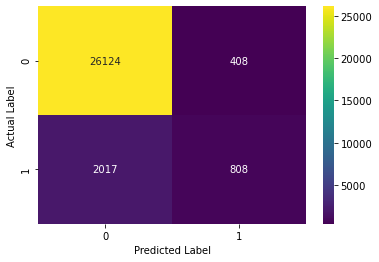

In [13]:
evaluation(y_test, lr_preds)

### Near Miss

In [14]:
nm = NearMiss()

X_train_under, y_train_under = nm.fit_resample(Xs_train, y_train)

In [15]:
y_train_under.value_counts()

1    8475
0    8475
Name: MOST_SEVERE_INJURY, dtype: int64

In [16]:
lr_under = LogisticRegression()
lr_under.fit(X_train_under, y_train_under)

/Users/leadelacruz-tordjeman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
lr_under.score(X_train_under, y_train_under), lr_under.score(Xs_test, y_test)

(0.8866076696165192, 0.33484347855707325)

In [18]:
lr_under_preds = lr_under.predict(Xs_test)

              precision    recall  f1-score   support

   No Injury       0.94      0.28      0.43     26532
      Injury       0.11      0.84      0.20      2825

    accuracy                           0.33     29357
   macro avg       0.53      0.56      0.31     29357
weighted avg       0.86      0.33      0.41     29357



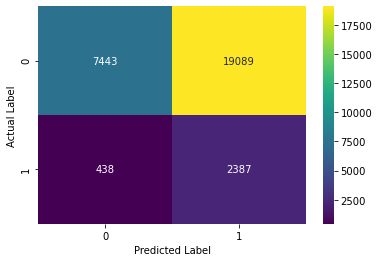

In [19]:
evaluation(y_test, lr_under_preds)

### Random Over-Sampler

In [20]:
ros = RandomOverSampler()

X_train_over, y_train_over = ros.fit_resample(Xs_train, y_train)

In [21]:
lr_over = LogisticRegression()

lr_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [22]:
lr_over.score(X_train_over, y_train_over), lr_over.score(Xs_test, y_test)

(0.7502544129656386, 0.7729332016214191)

In [23]:
lr_over_preds = lr_over.predict(Xs_test)

              precision    recall  f1-score   support

   No Injury       0.96      0.78      0.86     26532
      Injury       0.25      0.71      0.37      2825

    accuracy                           0.77     29357
   macro avg       0.61      0.74      0.62     29357
weighted avg       0.89      0.77      0.81     29357



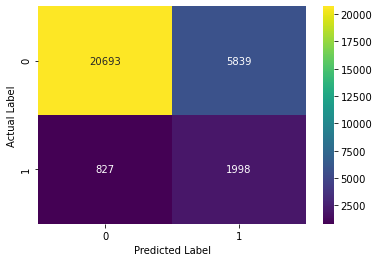

In [24]:
evaluation(y_test, lr_over_preds)

### SMOTE

In [25]:
smo = SMOTE()

X_train_smote, y_train_smote = smo.fit_resample(Xs_train, y_train)

In [26]:
lr_smote = LogisticRegression(max_iter = 1000)

lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [27]:
lr_smote.score(X_train_smote, y_train_smote), lr_smote.score(Xs_test, y_test)

(0.7533387775614047, 0.7697993664202746)

In [28]:
lr_smote_preds = lr_smote.predict(Xs_test)

              precision    recall  f1-score   support

   No Injury       0.96      0.78      0.86     26532
      Injury       0.25      0.71      0.37      2825

    accuracy                           0.77     29357
   macro avg       0.61      0.74      0.62     29357
weighted avg       0.89      0.77      0.81     29357



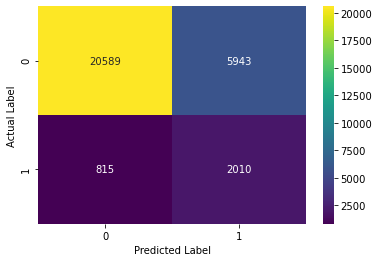

In [29]:
evaluation(y_test, lr_smote_preds)

In [30]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('sampling', SMOTE()),
        ('lr', LogisticRegression())
    ])

In [31]:
pipe_params = {
    'sampling__sampling_strategy': ['auto'],
    'sampling__k_neighbors': [1, 3],
    'lr__C': [0.01, 0.1]
}

In [32]:
gs = GridSearchCV(pipe, pipe_params, scoring = 'recall', cv = 3)

In [33]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('sampling', SMOTE()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.01, 0.1], 'sampling__k_neighbors': [1, 3],
                         'sampling__sampling_strategy': ['auto']},
             scoring='recall')

              precision    recall  f1-score   support

   No Injury       0.96      0.77      0.86     26532
      Injury       0.25      0.72      0.37      2825

    accuracy                           0.77     29357
   macro avg       0.61      0.75      0.62     29357
weighted avg       0.89      0.77      0.81     29357



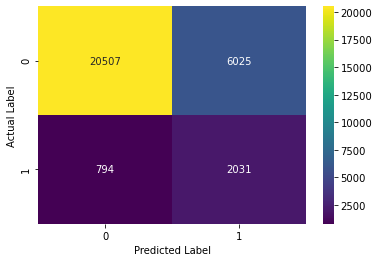

In [34]:
preds = gs.predict(X_test)

evaluation(y_test, preds)

In [35]:
gs.best_params_

{'lr__C': 0.01,
 'sampling__k_neighbors': 1,
 'sampling__sampling_strategy': 'auto'}

In [36]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.7271976401179941, 0.7189380530973452)